<a href="https://colab.research.google.com/github/hyewonleess/github_blog_posts/blob/main/TimeSeries__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 시계열 평활기법


1.   이동평균(Moving Average)
2.   지수평활(Exponential Smoothing)
3.   윈터스모형(Holt-Winters)



In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# load time-series data
temp = pd.read_csv('/content/drive/My Drive/data/githublog/temperatures.csv',header=0)
temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### simple data exploration

In [5]:
temp.dtypes

Date     object
Temp    float64
dtype: object

In [8]:
# change dtype of Date to 'datetime'
temp['Date'] = pd.to_datetime(temp['Date'], format='%Y-%m-%d')

In [10]:
print('처음 날짜: ', min(temp['Date']))
print('마지막 날짜 :', max(temp['Date']))

처음 날짜:  1981-01-01 00:00:00
마지막 날짜 : 1990-12-31 00:00:00


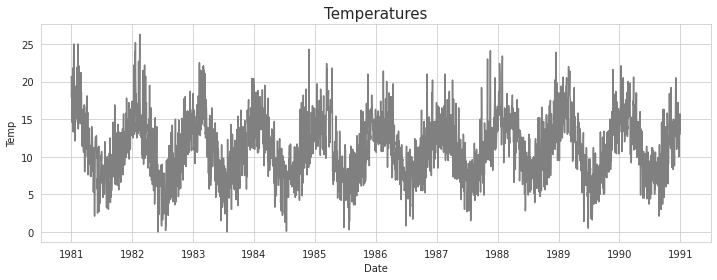

In [15]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.lineplot(data=temp, x='Date', y='Temp', color='grey')
plt.title('Temperatures', fontsize=15)
plt.show()

In [53]:
# train test 나누기
train = temp[temp['Date']<'1990-01-01']
test = temp[temp['Date']>='1990-01-01']

print(train.shape)
print(test.shape)

(3285, 12)
(365, 12)


### 1. 이동평균

In [20]:
# monthly
temp['window_month'] = temp['Temp'].rolling(window = 30, min_periods=1).mean()

# quaterly
temp['window_quarter'] = temp['Temp'].rolling(window = 120, min_periods=1).mean()

# yearly
temp['window_year'] = temp['Temp'].rolling(window = 365, min_periods=1).mean()

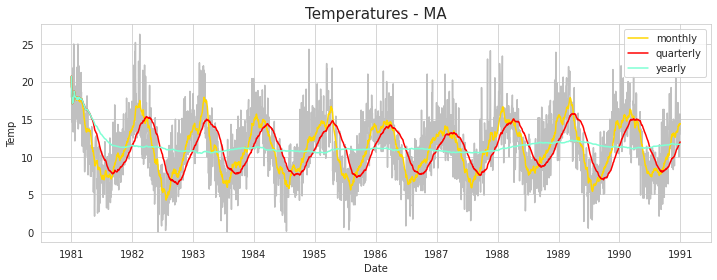

In [31]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='window_month', color='gold', label= 'monthly')
sns.lineplot(data=temp, x='Date', y='window_quarter', color='red', label='quarterly')
sns.lineplot(data=temp, x='Date', y='window_year', color='aquamarine', label='yearly')
plt.title('Temperatures - MA', fontsize=15)
plt.show()

In [65]:
preds_ma = []
num_train_idx = len(train)
num_test_idx = len(test)

for i in range(len(test)):
  idx = num_train_idx + i
  rolling = temp.iloc[idx-30:idx,:]
  ma = np.round(rolling['Temp'].mean(),1)
  preds_ma.append(ma)

print(len(preds_ma))

365


In [67]:
test['ma'] = preds_ma

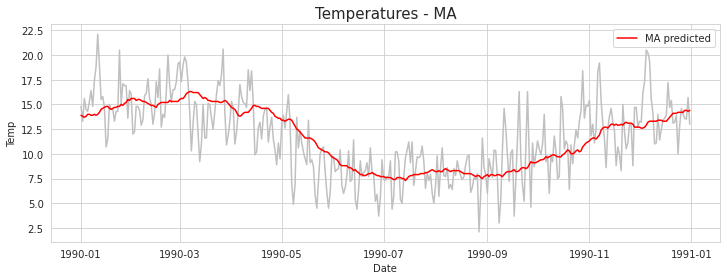

In [71]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')

sns.lineplot(data=test, x='Date', y='Temp', color='silver')
sns.lineplot(data=test, x='Date', y='ma', color='red', label= 'MA predicted')
plt.title('Temperatures - MA', fontsize=15)
plt.show()

### 2. 지수평활법

In [72]:
# simple  exponential smoothing
model = SimpleExpSmoothing(train['Temp']).fit(smoothing_level=0.01)
model1 = SimpleExpSmoothing(train['Temp']).fit(smoothing_level=0.2)
model2 = SimpleExpSmoothing(train['Temp']).fit(smoothing_level=0.5)

In [38]:
temp['simple_exp_0.01'] = model.fittedvalues
temp['simple_exp_0.2'] = model1.fittedvalues
temp['simple_exp_0.5'] = model2.fittedvalues

temp.head()

,Date,Temp,window_month,window_quarter,window_year,simple_exp,simple_exp_0.01,simple_exp_0.2,simple_exp_0.5
0,1981-01-01,20.7,20.700000,20.700000,20.700000,18.839238,14.020159,17.992207,19.097544
1,1981-01-02,17.9,19.300000,19.300000,19.300000,19.655615,14.086957,18.533766,19.898772
2,1981-01-03,18.8,19.133333,19.133333,19.133333,18.885369,14.125088,18.407012,18.899386
3,1981-01-04,14.6,18.000000,18.000000,18.000000,18.847915,14.171837,18.485610,18.849693
4,1981-01-05,15.8,17.560000,17.560000,17.560000,16.984216,14.176119,17.708488,16.724847


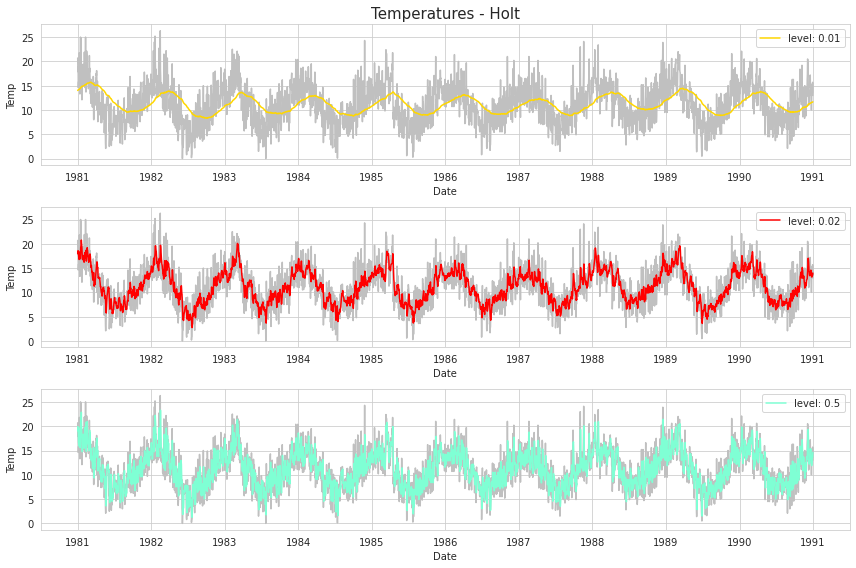

In [50]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')

plt.subplot(3,1,1)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='simple_exp_0.01', color='gold', label= 'level: 0.01')
plt.title('Temperatures - Holt', fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='simple_exp_0.2', color='red', label='level: 0.02')

plt.subplot(3,1,3)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='simple_exp_0.5', color='aquamarine', label='level: 0.5')

plt.tight_layout()
plt.show()

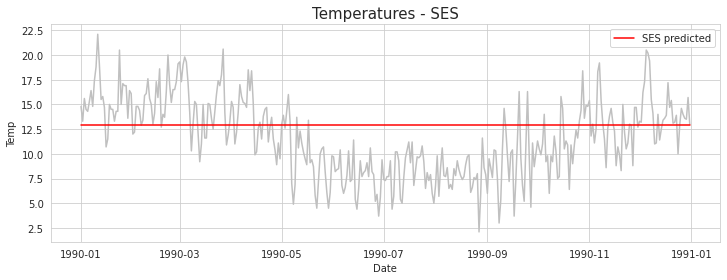

In [77]:
test['SES'] = model2.forecast(365)

plt.figure(figsize=(12,4))
sns.set_style('whitegrid')

sns.lineplot(data=test, x='Date', y='Temp', color='silver')
sns.lineplot(data=test, x='Date', y='SES', color='red', label= 'SES predicted')
plt.title('Temperatures - SES', fontsize=15)
plt.show()

### 3. Holt - Winters

In [153]:
# Holt
holt1 = Holt(train['Temp']).fit(smoothing_level=0.01)
holt2 = Holt(train['Temp']).fit(smoothing_level=0.2)
holt3 = Holt(train['Temp']).fit(smoothing_level=0.5)

In [154]:
temp['holt_0.01'] = holt1.fittedvalues
temp['holt_0.2'] = holt2.fittedvalues
temp['holt_0.5'] = holt3.fittedvalues

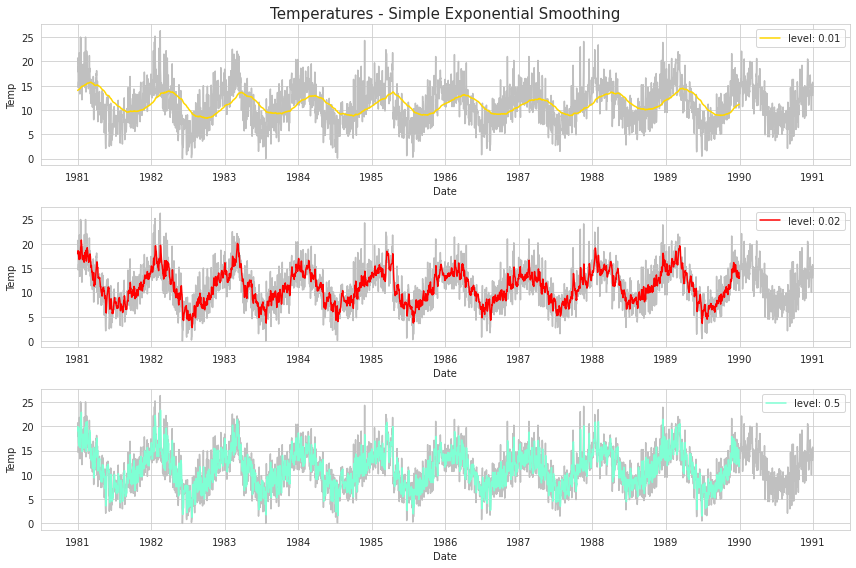

In [155]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')

plt.subplot(3,1,1)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='holt_0.01', color='gold', label= 'level: 0.01')
plt.title('Temperatures - Simple Exponential Smoothing', fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='holt_0.2', color='red', label='level: 0.02')

plt.subplot(3,1,3)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='holt_0.5', color='aquamarine', label='level: 0.5')

plt.tight_layout()
plt.show()

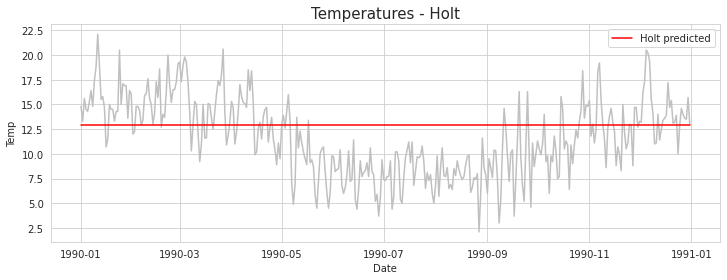

In [156]:
test['Holt'] = holt3.forecast(365).tolist()

plt.figure(figsize=(12,4))
sns.set_style('whitegrid')

sns.lineplot(data=test, x='Date', y='Temp', color='silver')
sns.lineplot(data=test, x='Date', y='Holt', color='red', label= 'Holt predicted')
plt.title('Temperatures - Holt', fontsize=15)
plt.show()

In [159]:
# Holt - winters
hw1 = ExponentialSmoothing(train['Temp'],seasonal_periods=12, seasonal= 'add', trend='add').fit()
hw2 = ExponentialSmoothing(train['Temp'],seasonal_periods=4, seasonal= 'add', trend='add').fit()
hw3 = ExponentialSmoothing(train['Temp'],seasonal_periods=365, seasonal= 'add',trend='add').fit()

temp['hw_0.01'] = hw1.fittedvalues
temp['hw_0.2'] = hw2.fittedvalues
temp['hw_0.5'] = hw3.fittedvalues

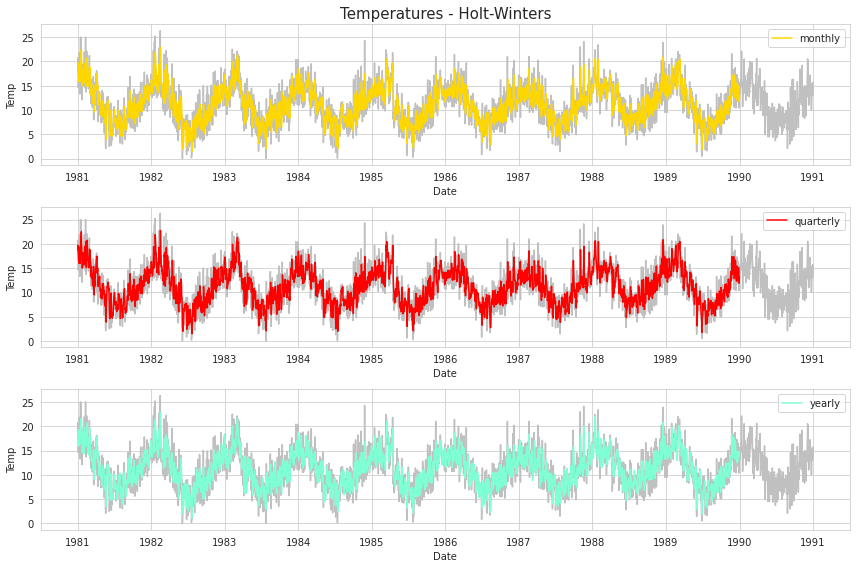

In [151]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')

plt.subplot(3,1,1)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='hw_0.01', color='gold', label= 'monthly')
plt.title('Temperatures - Holt-Winters', fontsize=15)

plt.subplot(3,1,2)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='hw_0.2', color='red', label='quarterly')

plt.subplot(3,1,3)
sns.lineplot(data=temp, x='Date', y='Temp', color='silver')
sns.lineplot(data=temp, x='Date', y='hw_0.5', color='aquamarine', label='yearly')

plt.tight_layout()
plt.show()

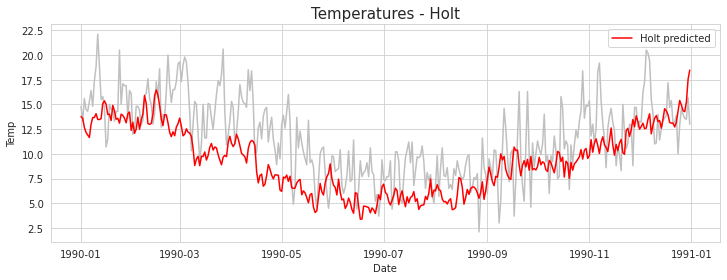

In [161]:
test['Holt-winters'] = hw3.forecast(365).tolist()

plt.figure(figsize=(12,4))
sns.set_style('whitegrid')

sns.lineplot(data=test, x='Date', y='Temp', color='silver')
sns.lineplot(data=test, x='Date', y='Holt-winters', color='red', label= 'Holt predicted')
plt.title('Temperatures - Holt', fontsize=15)
plt.show()